In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\buvan\Downloads\archive (4)\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(1025, 14)

In [12]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
955,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


In [13]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [14]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

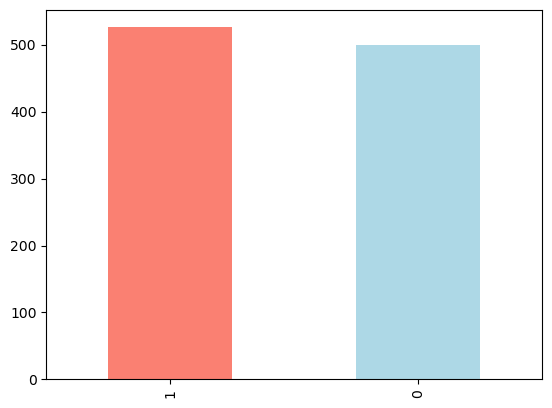

In [15]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [16]:
target_temp = df.target.value_counts()

In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [18]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [19]:
# Compare Target column with Sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


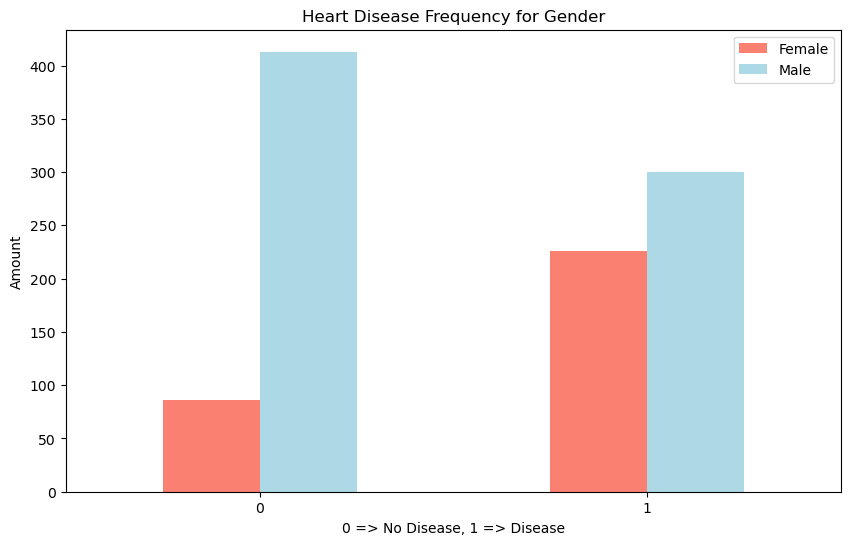

In [20]:
# Create of plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 => No Disease, 1 => Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

1    526
0    499
Name: target, dtype: int64


C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


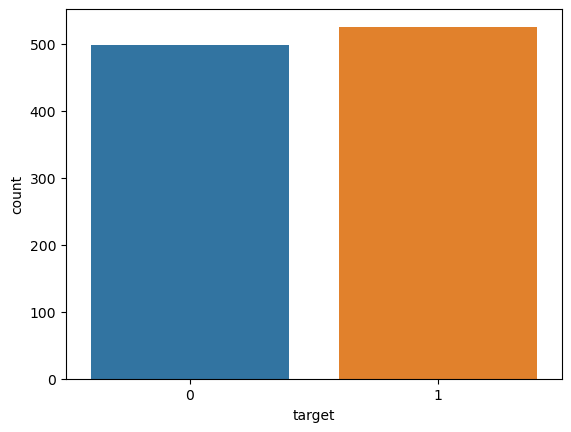

In [21]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [22]:
df["sex"].unique()

array([1, 0], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

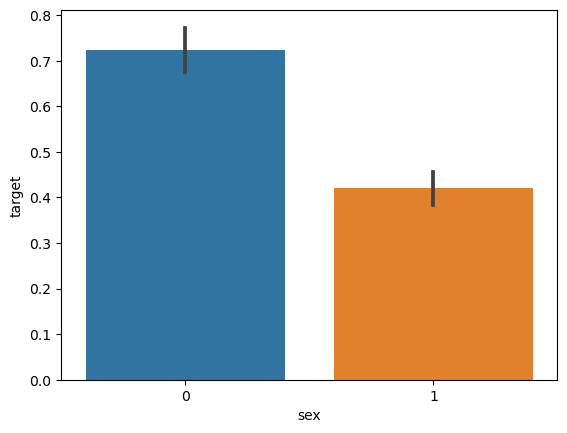

In [23]:
sns.barplot(df["sex"],y)

In [24]:
df["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

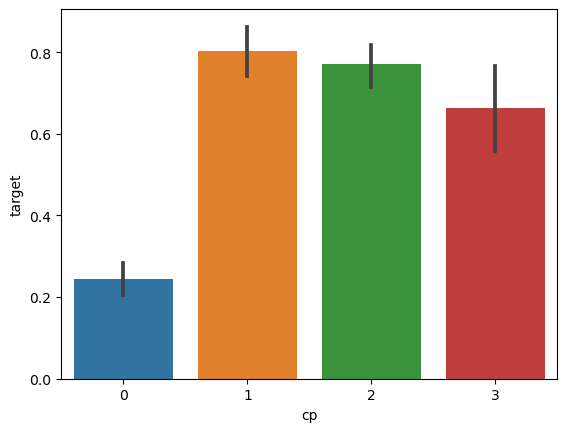

In [25]:
sns.barplot(df["cp"],y)

In [26]:
df["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [27]:
df["fbs"].unique()

array([0, 1], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

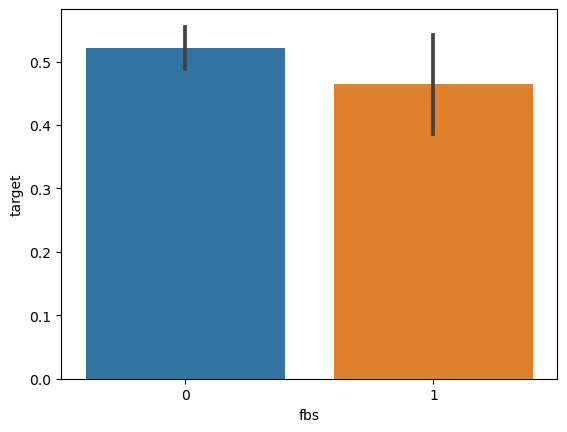

In [28]:
sns.barplot(df["fbs"],y)

In [29]:
df["restecg"].unique()

array([1, 0, 2], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

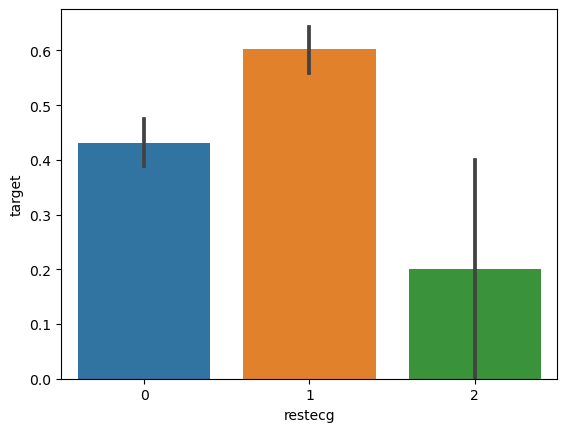

In [30]:
sns.barplot(df["restecg"],y)

In [31]:
df["exang"].unique()

array([0, 1], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

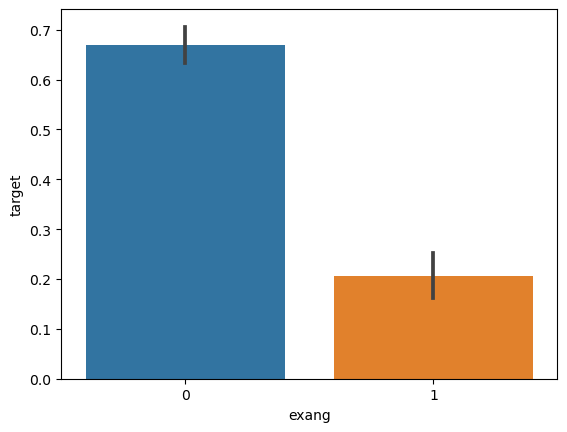

In [32]:
sns.barplot(df["exang"],y)

In [33]:
df["slope"].unique()

array([2, 0, 1], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

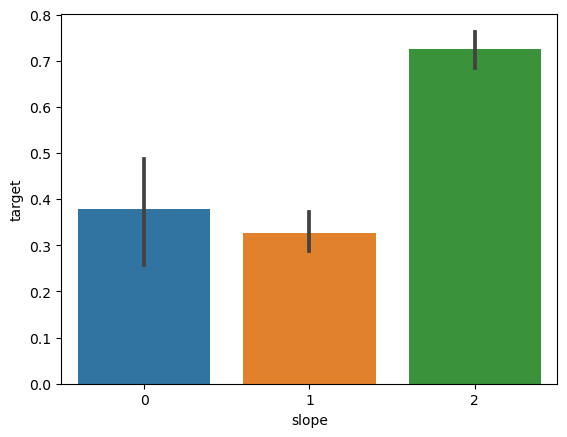

In [34]:
sns.barplot(df["slope"],y)

In [35]:
df["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

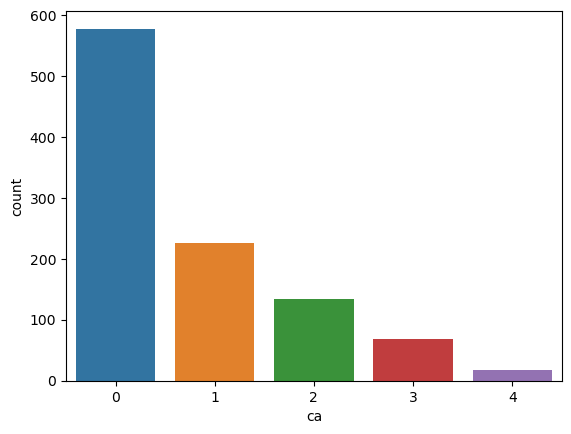

In [36]:
sns.countplot(df["ca"])

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

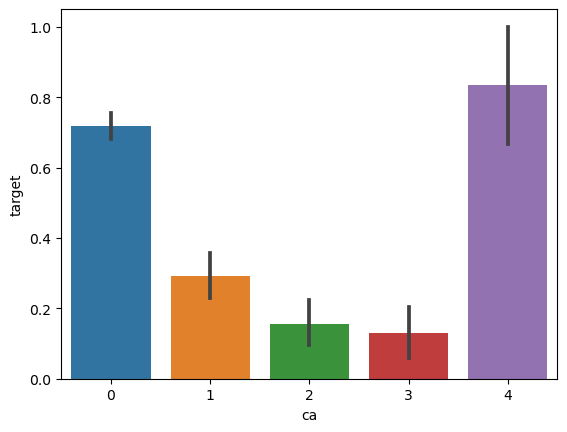

In [37]:
sns.barplot(df["ca"],y)

In [38]:
df["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

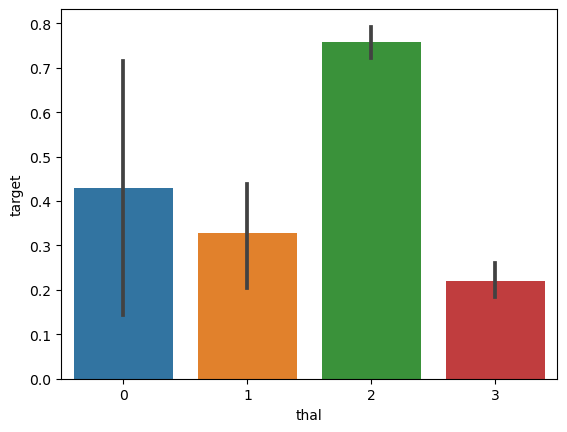

In [39]:
sns.barplot(df["thal"],y)

C:\Users\buvan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

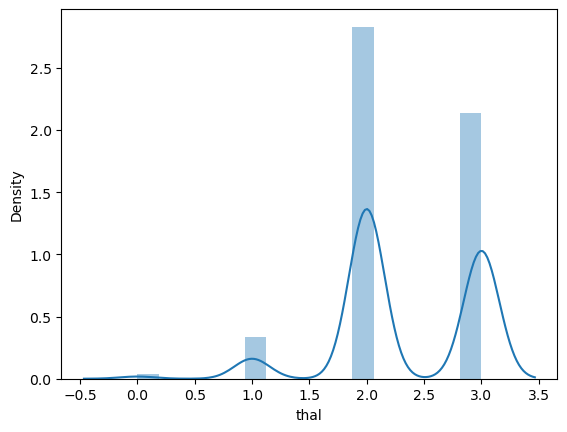

In [40]:
sns.distplot(df["thal"])

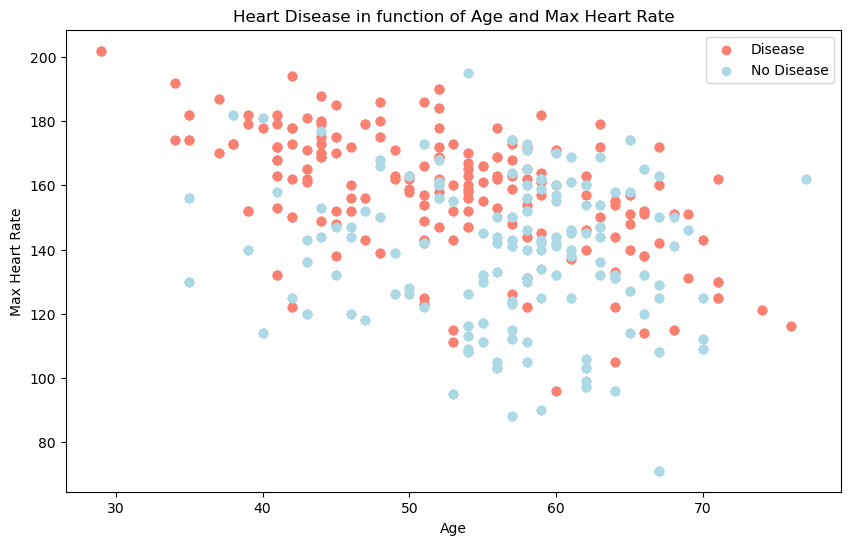

In [41]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

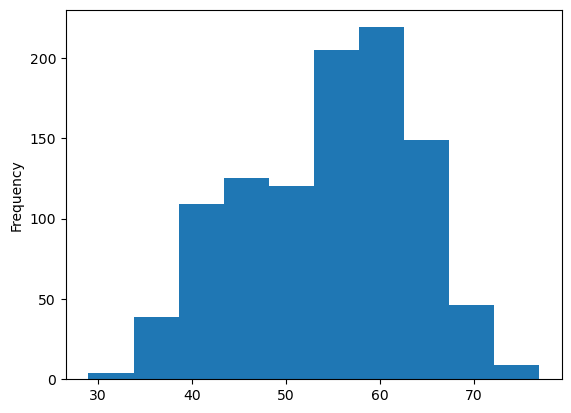

In [42]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [43]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


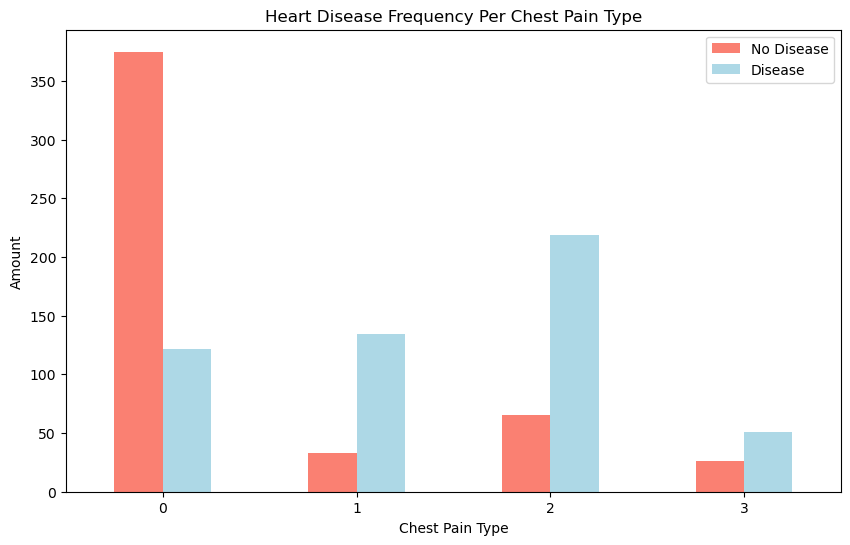

In [44]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [6]:
# Make a correlation matrix
abs(df.corr())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.103240,0.071966,0.271121,0.219823,0.121243,0.132696,0.390227,0.088163,0.208137,0.169105,0.271551,0.072297,0.229324
sex,0.103240,1.000000,0.041119,0.078974,0.198258,0.027200,0.055117,0.049365,0.139157,0.084687,0.026666,0.111729,0.198424,0.279501
cp,0.071966,0.041119,1.000000,0.038177,0.081641,0.079294,0.043581,0.306839,0.401513,0.174733,0.131633,0.176206,0.163341,0.434854
trestbps,0.271121,0.078974,0.038177,1.000000,0.127977,0.181767,0.123794,0.039264,0.061197,0.187434,0.120445,0.104554,0.059276,0.138772
chol,0.219823,0.198258,0.081641,0.127977,1.000000,0.026917,0.147410,0.021772,0.067382,0.064880,0.014248,0.074259,0.100244,0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,0.104051,0.008866,0.049261,0.010859,0.061902,0.137156,0.042177,0.041164
restecg,0.132696,0.055117,0.043581,0.123794,0.147410,0.104051,1.000000,0.048411,0.065606,0.050114,0.086086,0.078072,0.020504,0.134468
thalach,0.390227,0.049365,0.306839,0.039264,0.021772,0.008866,0.048411,1.000000,0.380281,0.349796,0.395308,0.207888,0.098068,0.422895
exang,0.088163,0.139157,0.401513,0.061197,0.067382,0.049261,0.065606,0.380281,1.000000,0.310844,0.267335,0.107849,0.197201,0.438029
oldpeak,0.208137,0.084687,0.174733,0.187434,0.064880,0.010859,0.050114,0.349796,0.310844,1.000000,0.575189,0.221816,0.202672,0.438441


In [9]:
abs(df.drop('target',axis=1).corrwith(df['target']))

age         0.229324
sex         0.279501
cp          0.434854
trestbps    0.138772
chol        0.099966
fbs         0.041164
restecg     0.134468
thalach     0.422895
exang       0.438029
oldpeak     0.438441
slope       0.345512
ca          0.382085
thal        0.337838
dtype: float64

<AxesSubplot:title={'center':'correlation with income'}>

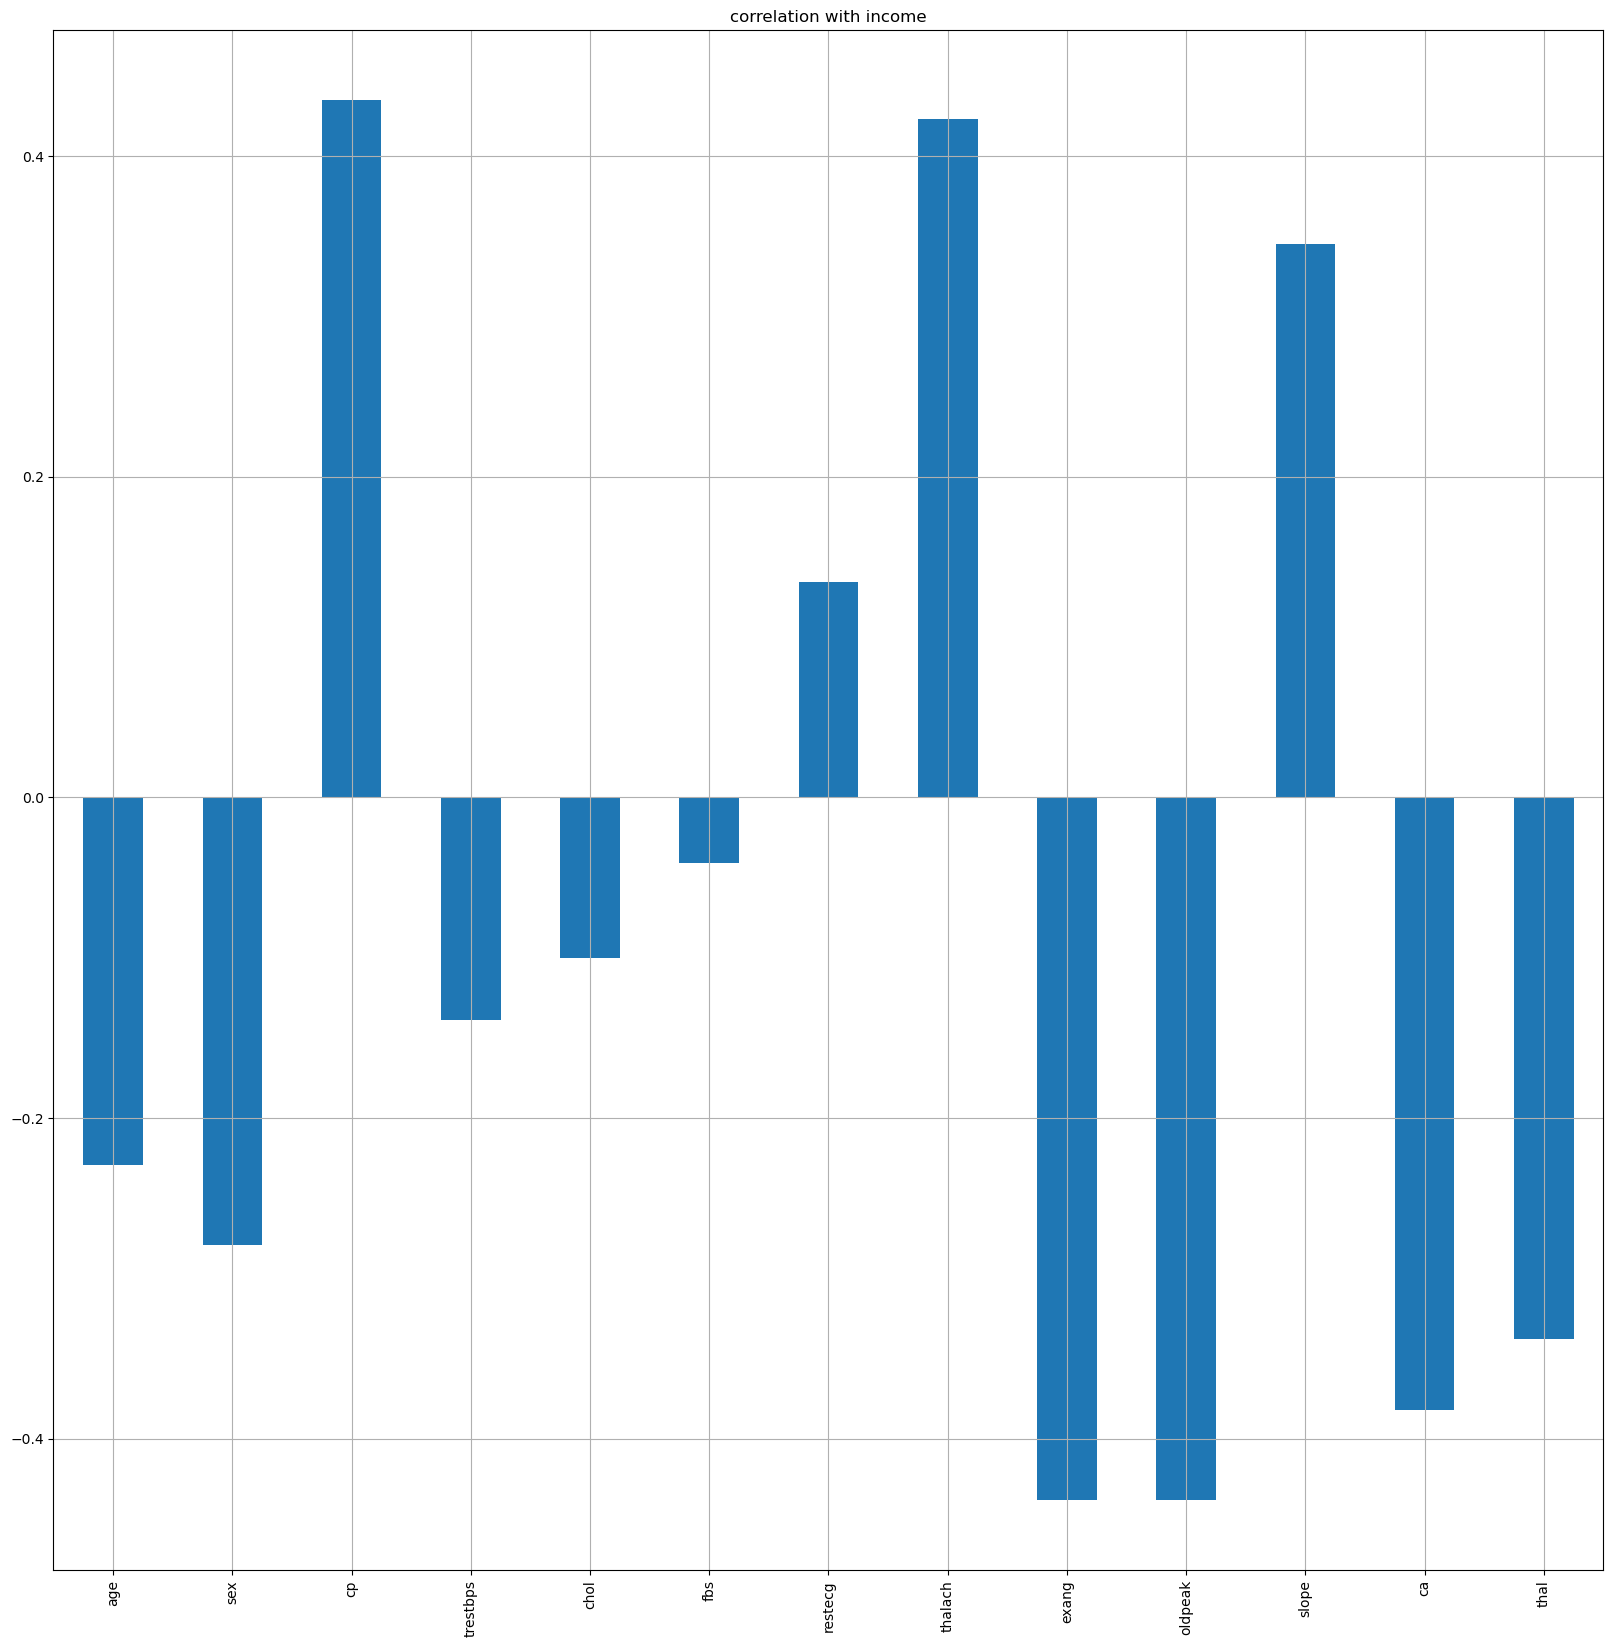

In [10]:
df.drop('target',axis=1).corrwith(df['target']).plot(kind='bar',grid=True,figsize=(20,20),title='correlation with income')

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR=q3-q1
IQR

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [13]:
cols = ['age','trestbps','chol','thalach']
cols

['age', 'trestbps', 'chol', 'thalach']

In [15]:
for i in cols:
    itv_high = (q3[i]+1.5*IQR[i])
    ind = np.where(df[i]>itv_high)
    df.drop(df.index[ind])

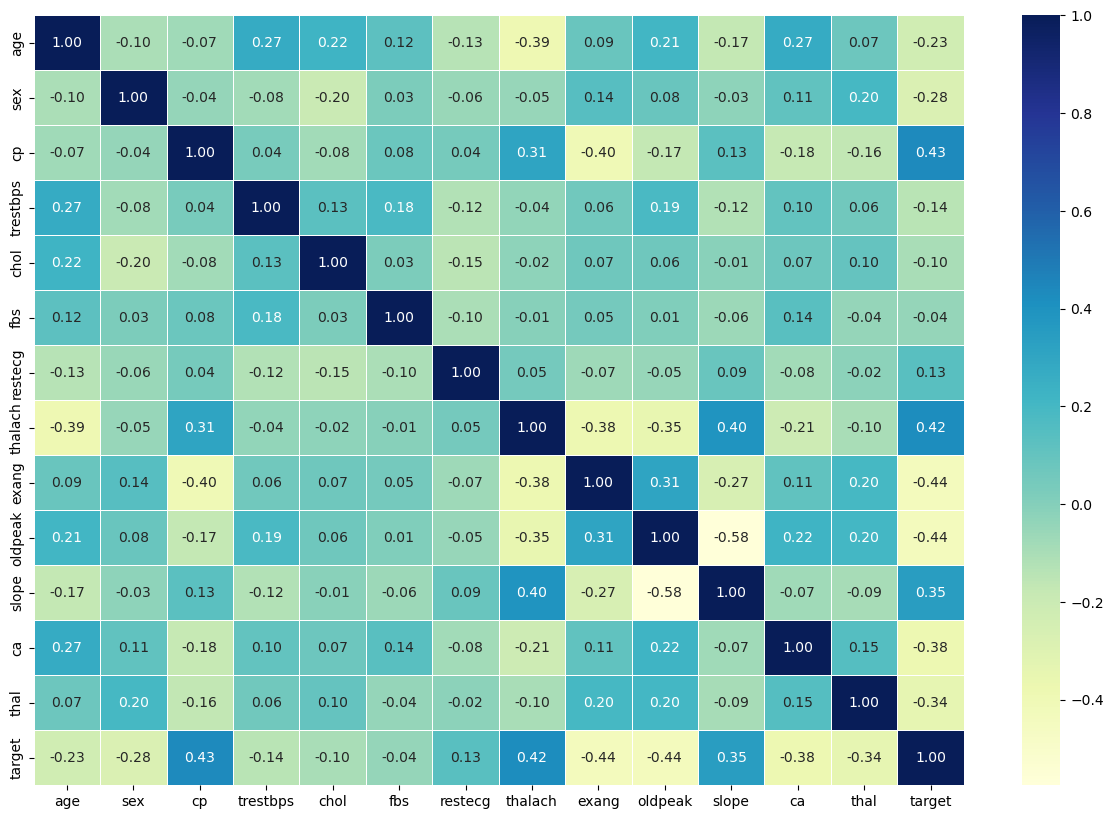

In [46]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [17]:
# Split data into X & y
X = df.drop("target", axis=1)
y = df["target"]

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [49]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=X.columns)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.428872,age
1,1.155948,sex
2,1.293277,cp
3,1.167890,trestbps
4,1.146047,chol
5,1.090063,fbs
6,1.064442,restecg
7,1.615182,thalach
8,1.419047,exang
9,1.708555,oldpeak


In [21]:
#vif<5 so no multicollinearity problem

In [22]:
# Split data into train and test sets
np.random.seed(7)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
len(X_train), len(X_test), len(y_train), len(y_test)

(820, 205, 820, 205)

In [52]:
X_train.shape

(820, 13)

In [53]:
X_test.shape

(205, 13)

In [54]:
y_train.shape

(820,)

In [55]:
y_test.shape

(205,)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
#LOGISTIC REGRESSION
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [27]:
y_pred_lr.shape

(205,)

In [28]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.83 %


In [29]:
#NAIVE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

In [31]:
y_pred_nb.shape

(205,)

In [32]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 84.88 %


In [33]:
#SVM

In [34]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

In [35]:
y_pred_svm.shape

(205,)

In [36]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.34 %


In [37]:
#KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [39]:
y_pred_knn.shape

(205,)

In [40]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 81.95 %


In [41]:
#DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [43]:
print(y_pred_dt.shape)

(205,)


In [44]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [45]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [46]:
y_pred_rf.shape

(205,)

In [47]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [48]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [49]:
y_pred_xgb.shape

(205,)

In [50]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


In [51]:
from keras.models import Sequential
from keras.layers import Dense

In [52]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 3s 1ms/step - loss: 0.7519 - accuracy: 0.5463
Epoch 2/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5854
Epoch 3/300
26/26 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6073
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.6512
Epoch 5/300
26/26 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.6878
Epoch 6/300
26/26 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7073
Epoch 7/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7280
Epoch 8/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7402
Epoch 9/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7573
Epoch 10/300
26/26 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7878
Epoch 11/

26/26 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9159
Epoch 83/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9159
Epoch 84/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9171
Epoch 85/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9195
Epoch 86/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9207
Epoch 87/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2368 - accuracy: 0.9195
Epoch 88/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9207
Epoch 89/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9207
Epoch 90/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9207
Epoch 91/300
26/26 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9207
Epoch 92/300


26/26 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9451
Epoch 164/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9439
Epoch 165/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9439
Epoch 166/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9451
Epoch 167/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9451
Epoch 168/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9439
Epoch 169/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1800 - accuracy: 0.9439
Epoch 170/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.9427
Epoch 171/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9463
Epoch 172/300
26/26 [==============================] - 0s 917us/step - loss: 0.1784 - accuracy: 0.9463
Ep

Epoch 244/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.9524
Epoch 245/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9537
Epoch 246/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9549
Epoch 247/300
26/26 [==============================] - 0s 938us/step - loss: 0.1392 - accuracy: 0.9549
Epoch 248/300
26/26 [==============================] - 0s 918us/step - loss: 0.1385 - accuracy: 0.9561
Epoch 249/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.9549
Epoch 250/300
26/26 [==============================] - 0s 918us/step - loss: 0.1376 - accuracy: 0.9549
Epoch 251/300
26/26 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9549
Epoch 252/300
26/26 [==============================] - 0s 918us/step - loss: 0.1367 - accuracy: 0.9585
Epoch 253/300
26/26 [==============================] - 0s 983us/step - loss: 0.1363

In [54]:
y_pred_nn = model.predict(X_test)

7/7 [==============================] - 0s 997us/step


In [55]:
y_pred_nn.shape

(205, 1)

In [56]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

In [57]:
score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 93.17 %


In [58]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.83 %
The accuracy score achieved using Naive Bayes is: 84.88 %
The accuracy score achieved using Support Vector Machine is: 86.34 %
The accuracy score achieved using K-Nearest Neighbors is: 81.95 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 93.17 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

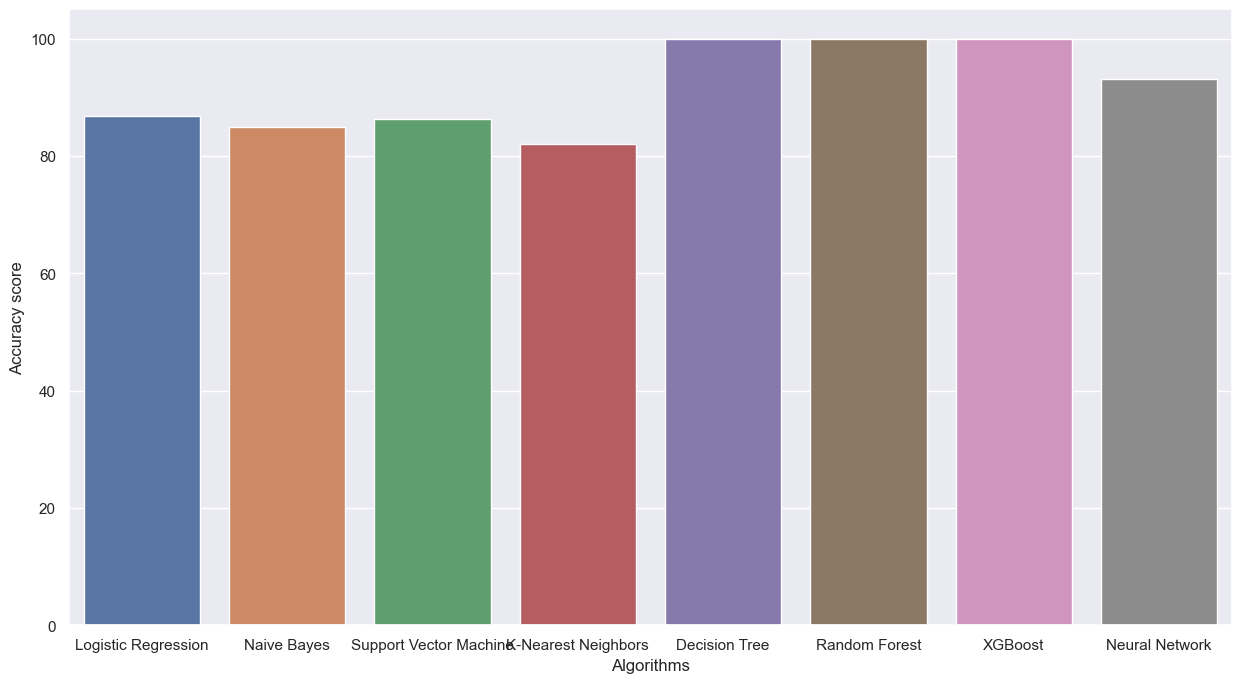

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [60]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn Machine Learning Models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to the model score
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [61]:
model_scores = fit_and_score( models=models,
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8682926829268293,
 'KNN': 0.848780487804878,
 'Random Forest': 1.0}

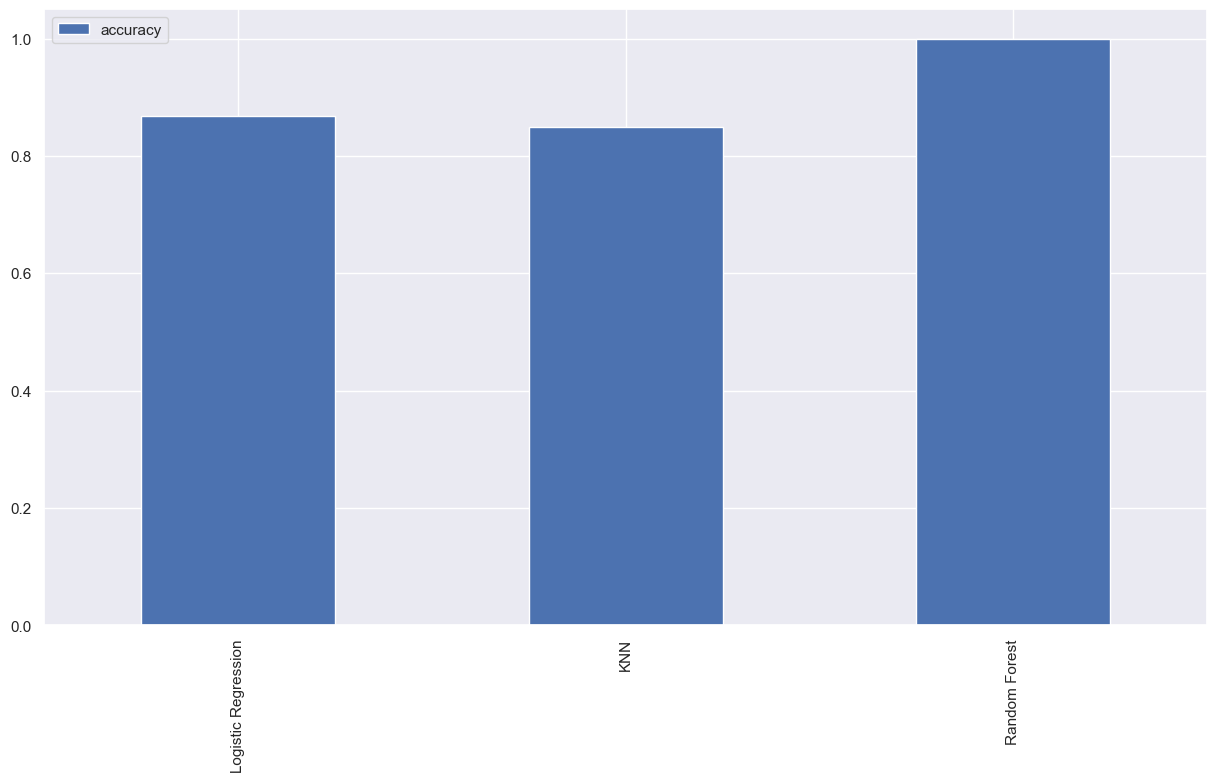

In [62]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [63]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing scores list
    test_scores.append(knn.score(X_test, y_test))

In [64]:
train_scores

[1.0,
 0.9951219512195122,
 0.9939024390243902,
 0.9780487804878049,
 0.9585365853658536,
 0.9024390243902439,
 0.8841463414634146,
 0.8829268292682927,
 0.8841463414634146,
 0.8890243902439025,
 0.8902439024390244,
 0.8804878048780488,
 0.8902439024390244,
 0.8804878048780488,
 0.8853658536585366,
 0.8853658536585366,
 0.8768292682926829,
 0.874390243902439,
 0.8719512195121951,
 0.8695121951219512]

In [65]:
test_scores

[0.9804878048780488,
 0.9414634146341463,
 0.9512195121951219,
 0.9121951219512195,
 0.848780487804878,
 0.8439024390243902,
 0.8195121951219512,
 0.8097560975609757,
 0.8439024390243902,
 0.8634146341463415,
 0.8829268292682927,
 0.8780487804878049,
 0.8682926829268293,
 0.8634146341463415,
 0.8634146341463415,
 0.8682926829268293,
 0.8780487804878049,
 0.8731707317073171,
 0.8585365853658536,
 0.8731707317073171]

Maximum KNN score on the test data: 98.05%


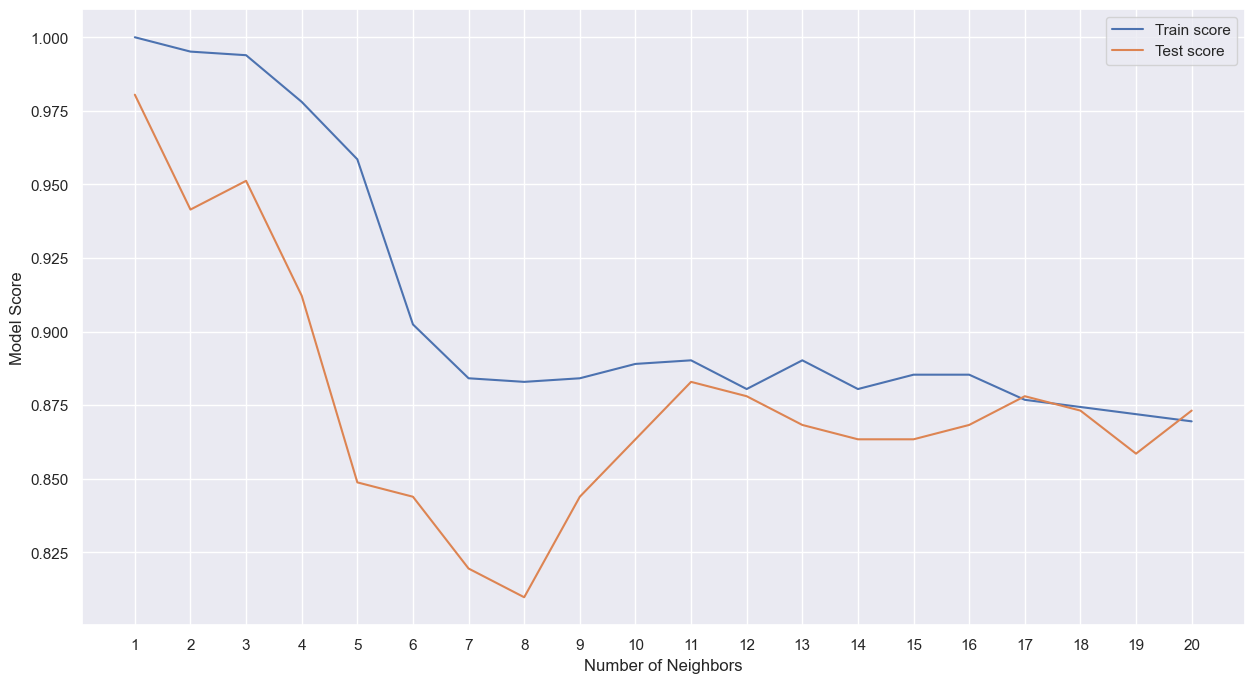

In [66]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:0.2f}%");

In [67]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [68]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

In [70]:
rs_log_reg.score(X_test, y_test)

0.8439024390243902

In [71]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [72]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [73]:
# Evaluate the randomized seach RandomForestClassifier
rs_rf.score(X_test, y_test)

0.9512195121951219

In [74]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.004520353656360241, 'solver': 'liblinear'}

In [76]:
# Evaluate
gs_log_reg.score(X_test, y_test)

0.8439024390243902

In [77]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [78]:
y_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1], dtype=int64)

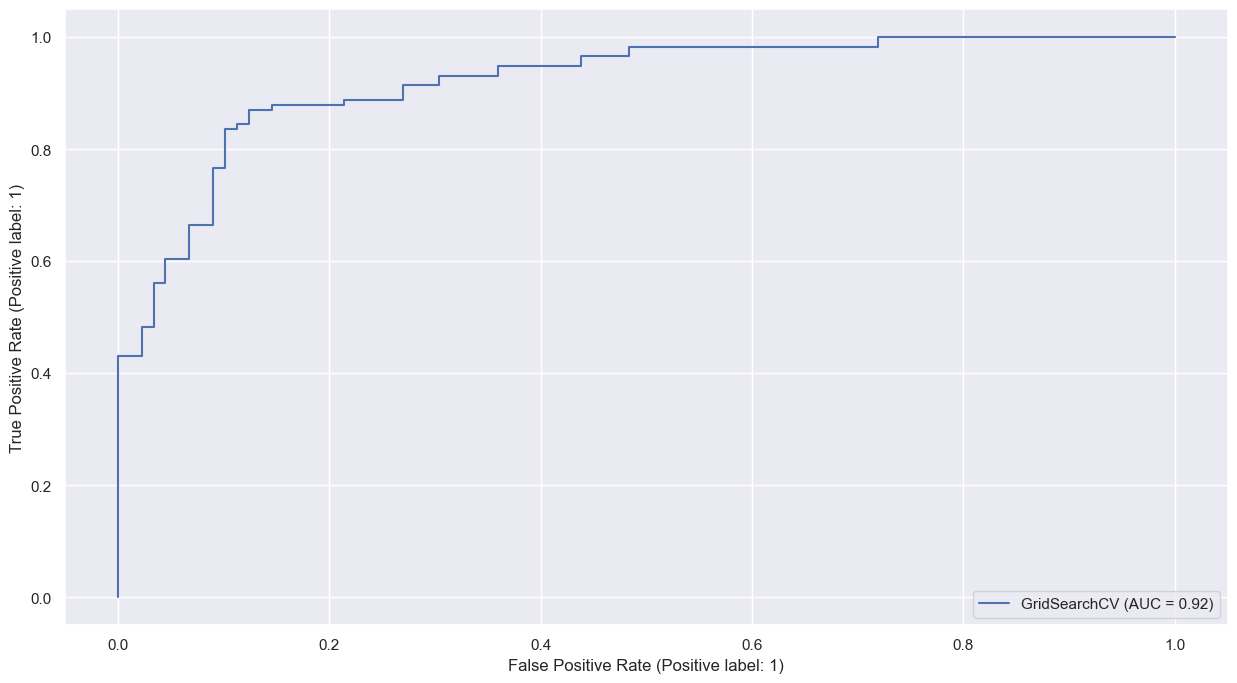

In [79]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [80]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 70  19]
 [ 13 103]]


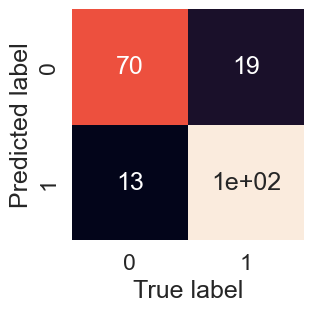

In [81]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [82]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        89
           1       0.84      0.89      0.87       116

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [83]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.004520353656360241, 'solver': 'liblinear'}

In [84]:
# Create a new classfier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [85]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X,y, cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8478048780487806

In [86]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X,y, cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8236738868775481

In [87]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X,y, cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8955256064690026

In [88]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X,y, cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8580364853451075

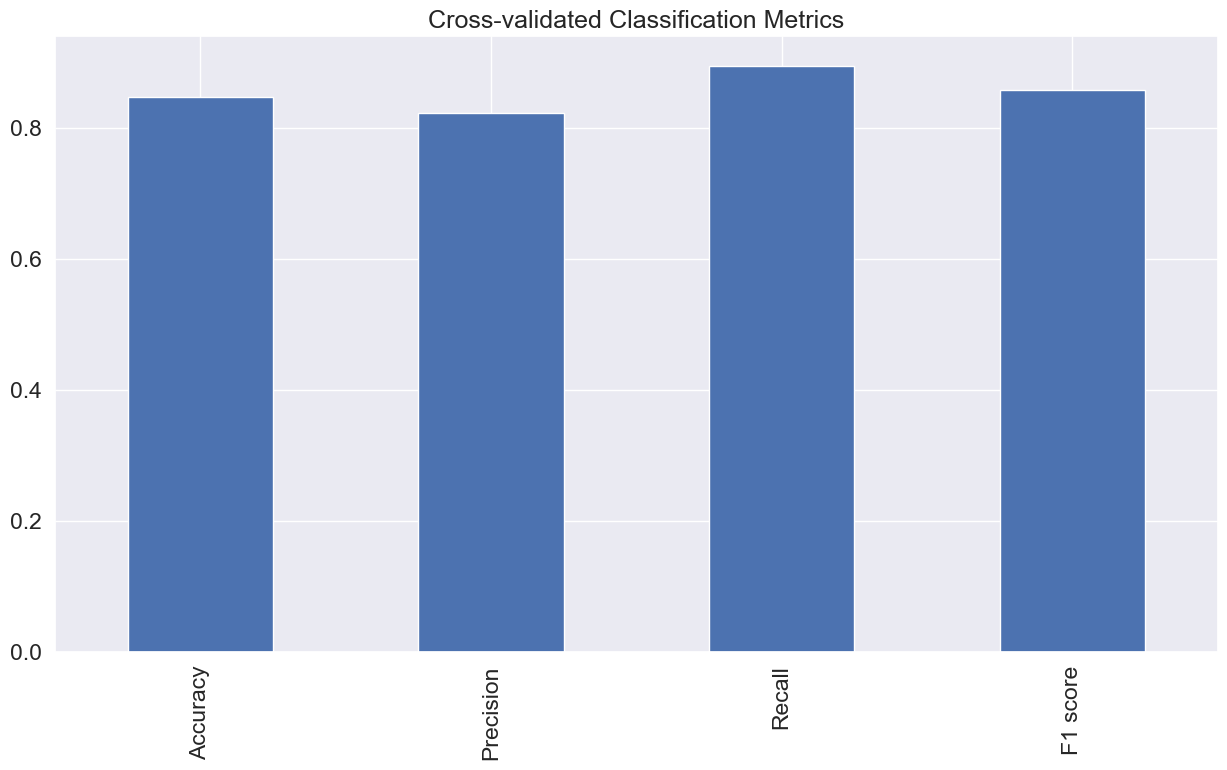

In [89]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 score": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                     legend=False);

In [90]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [91]:
# Check coef_
clf.coef_

array([[-0.10144784, -0.88272266,  0.81495769, -0.26720029, -0.2862836 ,
        -0.10124182,  0.17121701,  0.55440548, -0.50041051, -0.52249009,
         0.33921788, -0.69212397, -0.49123415]])

In [92]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.10144783807878655,
 'sex': -0.8827226575808768,
 'cp': 0.8149576940289065,
 'trestbps': -0.2672002869335777,
 'chol': -0.2862836005216915,
 'fbs': -0.10124182033359,
 'restecg': 0.17121701400487066,
 'thalach': 0.5544054844551349,
 'exang': -0.5004105063102215,
 'oldpeak': -0.522490091255114,
 'slope': 0.3392178779848465,
 'ca': -0.6921239737699862,
 'thal': -0.4912341507307388}

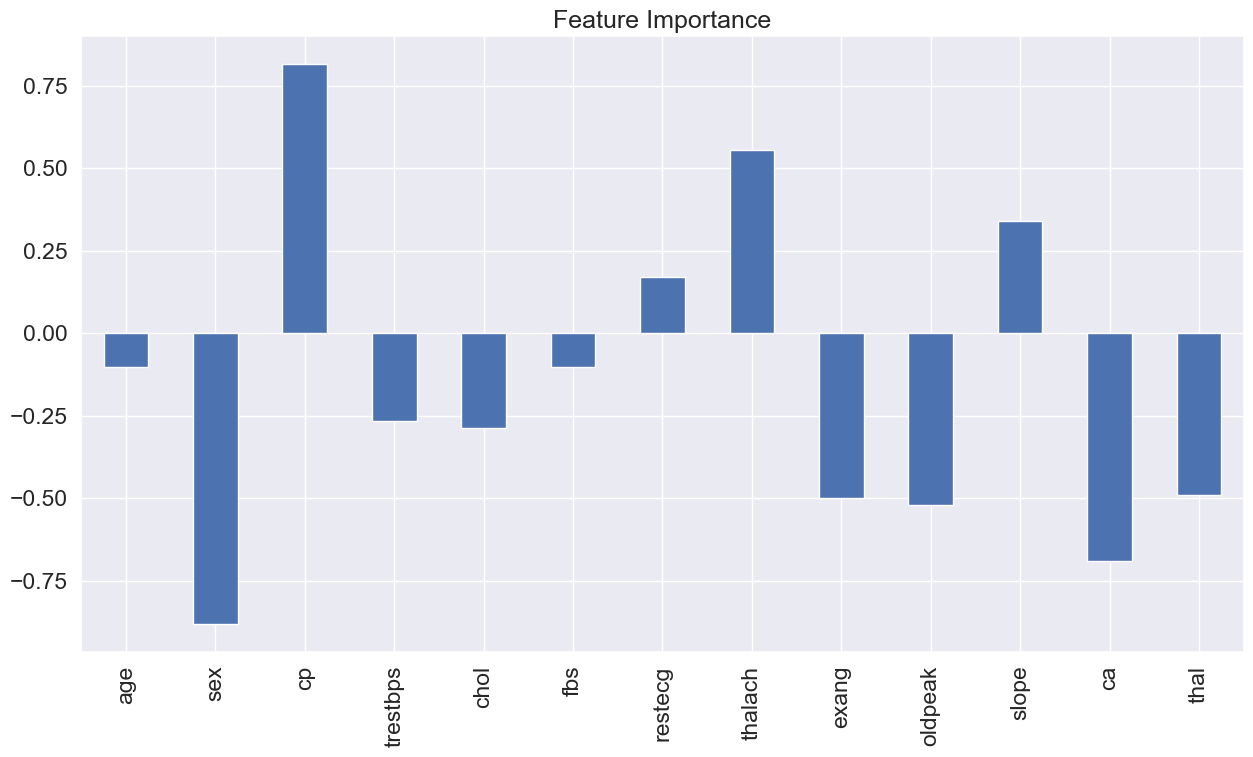

In [93]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [94]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


In [95]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


In [96]:
import pickle
# Creating a pickle file for the classifier
pickle.dump(clf, open('clfmodel.pkl', 'wb'))